In [ ]:
from google.colab import drive
drive.mount("/content/House_Sales_Price_Prediction_2")

Mounted at /content/House_Sales_Price_Prediction_2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
import joblib  # Import joblib for model saving

# Calculate Relative Absolute Error (RAE)
def relative_absolute_error(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mean_target = y_true.mean()
    rae = mae / mean_target
    return rae

In [ ]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the pyplot module from matplotlib for data visualization
import matplotlib.pyplot as plt

# Import the train_test_split function from scikit-learn for splitting the dataset
from sklearn.model_selection import train_test_split

# Read the CSV file containing the training data into a pandas DataFrame
train_data = pd.read_csv("/content/House_Sales_Price_Prediction_2/MyDrive/sales_price train.csv")

# Display the DataFrame (in an interactive environment like Jupyter Notebook, this would show the DataFrame)
train_data  # Note: This line is effective in an interactive environment like Jupyter Notebook.
            # If running as a script, you might want to use `print(train_data)` to see the output.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
test_data=pd.read_csv("/content/House_Sales_Price_Prediction_2/MyDrive/sales_price test.csv")
(test_data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data (uncomment and modify the paths as necessary)
# train_data = pd.read_csv('path_to_train_data.csv')
# test_data = pd.read_csv('path_to_test_data.csv')

# Drop rows with missing target values
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

# Separate target from predictors
y = train_data.SalePrice
X = train_data.drop(['SalePrice'], axis=1)

# Select only numerical columns (exclude object type)
X = X.select_dtypes(exclude=['object'])
X_test = test_data.select_dtypes(exclude=['object'])

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
618,619,20,90.0,11694,9,5,2007,2007,452.0,48,...,774,0,108,0,0,260,0,0,7,2007
870,871,20,60.0,6600,5,5,1962,1962,0.0,0,...,308,0,0,0,0,0,0,0,8,2009
92,93,30,80.0,13360,5,7,1921,2006,0.0,713,...,432,0,0,44,0,0,0,0,8,2009
817,818,20,NaN,13265,8,5,2002,2002,148.0,1218,...,857,150,59,0,0,0,0,0,7,2008
302,303,20,118.0,13704,7,5,2001,2002,150.0,0,...,843,468,81,0,0,0,0,0,1,2006


In [ ]:
(X_train.shape)

(1168, 37)

In [ ]:
missing_value_count_num=(X_train.isnull().sum())
(missing_value_count_num[missing_value_count_num>0])

LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64

In [ ]:
# Import the RandomForestRegressor class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestRegressor

# Import the mean_absolute_error function from the sklearn.metrics module
from sklearn.metrics import mean_absolute_error

# Define a function to train a model and calculate the mean absolute error
def score_datasets(X_train, X_valid, y_train, y_valid):
    # Initialize the RandomForestRegressor model with 100 trees, a random state for reproducibility, and a max depth of 7
    model_1 = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=7)

    # Fit the model to the training data (X_train, y_train)
    model_1.fit(X_train, y_train)

    # Predict the target values for the validation data (X_valid)
    preds = model_1.predict(X_valid)

    # Calculate and return the mean absolute error between the predicted and actual target values for the validation set
    return mean_absolute_error(y_valid, preds)

In [ ]:
# Identify columns in the training set that contain missing values
missing_value_names = [col for col in X_train.columns
                       if X_train[col].isnull().any()]

# Drop columns with missing values from the training set
reduced_X_train = X_train.drop(missing_value_names, axis=1)

# Drop the same columns with missing values from the validation set
reduced_X_valid = X_valid.drop(missing_value_names, axis=1)

In [ ]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Print a header message to indicate the following output is for the MAE after dropping columns with missing values
print("MAE (Drop columns with missing values):")

# Call the function `score_datasets` with the reduced training and validation sets (after dropping columns with missing values),
# and the corresponding target values, then print the resulting MAE (Mean Absolute Error)
print(score_datasets(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE (Drop columns with missing values):
18731.458366738945


In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Instantiate the SimpleImputer with a specified strategy (e.g., 'mean')
my_imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))

# Transform the validation data
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Restore the original column names
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [ ]:
print("MAE (Imputation):")
print(score_datasets(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE (Imputation):
18764.074439598087


In [ ]:
# Calculate and print RAE for the validation set
rae_valid = relative_absolute_error(y_valid, preds_valid)
print("RAE (Your approach):")
print(rae_valid)

RAE (Your approach):
0.1006261753176237


In [ ]:
# Create a SimpleImputer object with the strategy of replacing missing values with the mean
final_imputer = SimpleImputer(strategy='mean')

# Impute missing values in the training set using the mean, and convert the result into a DataFrame
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))

# Impute missing values in the test set using the mean (using the same imputer object as the training set), and convert the result into a DataFrame
final_X_test = pd.DataFrame(final_imputer.transform(X_test))

# Set the column names of the imputed training set to be the same as the original training set
final_X_train.columns = X_train.columns

# Set the column names of the imputed test set to be the same as the original test set
final_X_test.columns = X_test.columns

In [ ]:
# Fit the final model on the entire training data
final_model = RandomForestRegressor(n_estimators=100, random_state=0)
final_model.fit(final_X_train, y_train)

# Save the final model using joblib
joblib.dump(final_model, 'final_model.joblib')

# Make predictions on the test data
final_preds_test = final_model.predict(final_X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Save test predictions to file
output_final = pd.DataFrame({'Id': test_data.index, 'SalePrice': final_preds_test})
output_final.to_csv('submission_final.csv', index=False)
print(output_final)

        Id      SalePrice
0        0  130612.576353
1        1  164461.403294
2        2  181465.584738
3        3  202697.965690
4        4  192413.642208
...    ...            ...
1454  1454   60543.799147
1455  1455   70023.409321
1456  1456  190509.283780
1457  1457  107762.150572
1458  1458  253946.104221

[1459 rows x 2 columns]


RAE (Linear Regression): 0.13213351325563297
        Id      SalePrice
0        0  130612.576353
1        1  164461.403294
2        2  181465.584738
3        3  202697.965690
4        4  192413.642208
...    ...            ...
1454  1454   60543.799147
1455  1455   70023.409321
1456  1456  190509.283780
1457  1457  107762.150572
1458  1458  253946.104221

[1459 rows x 2 columns]


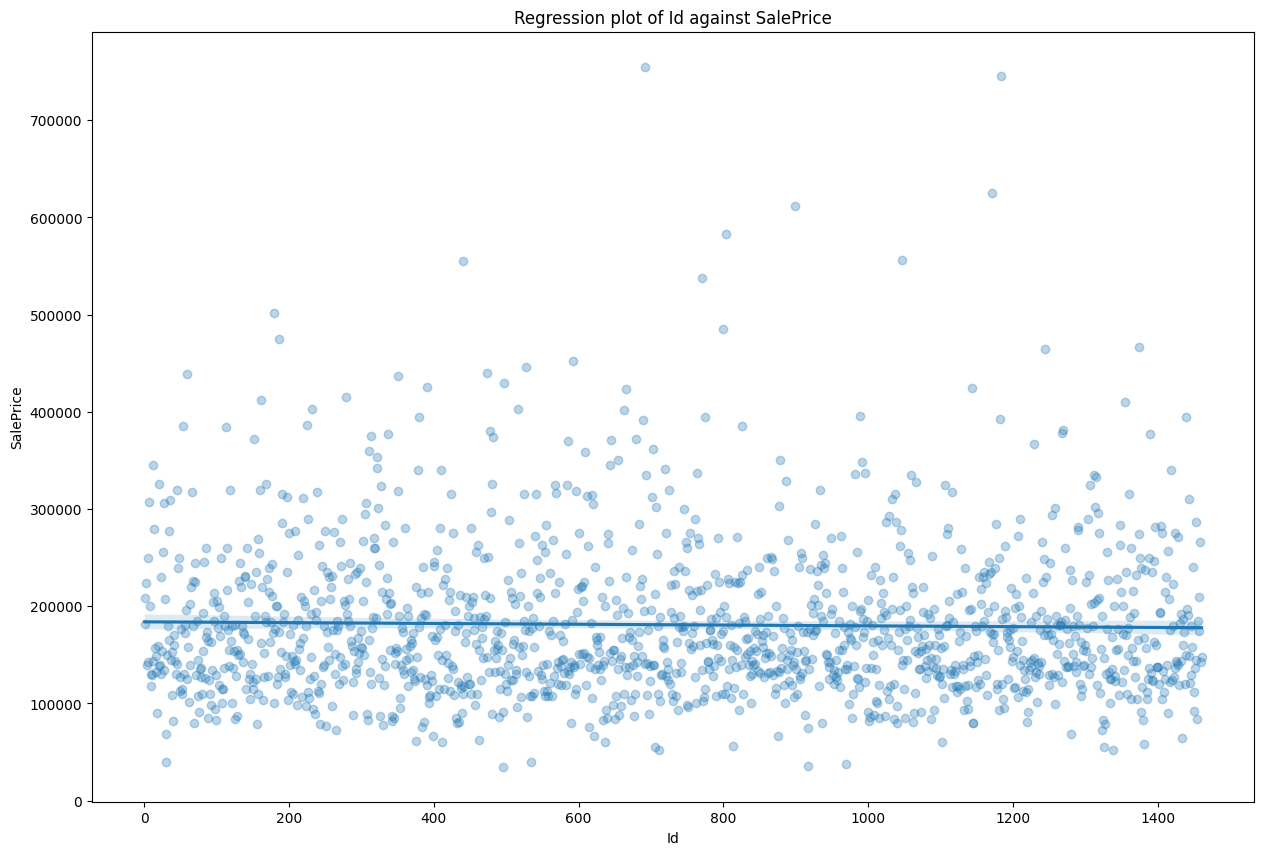

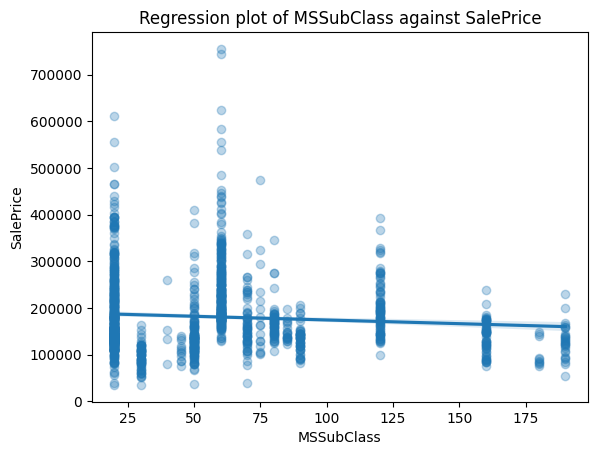

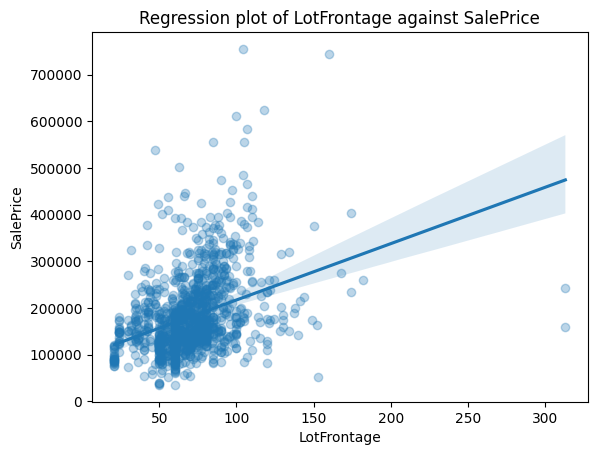

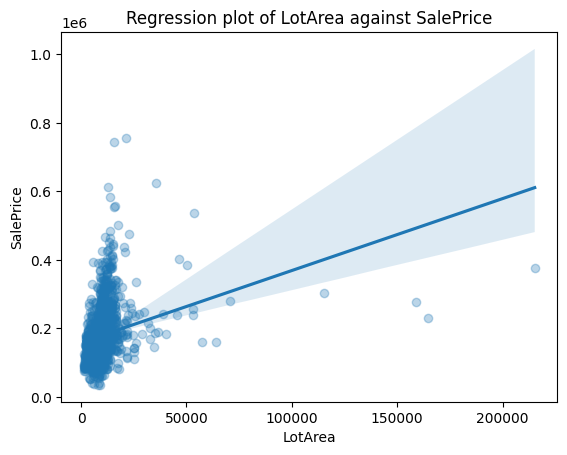

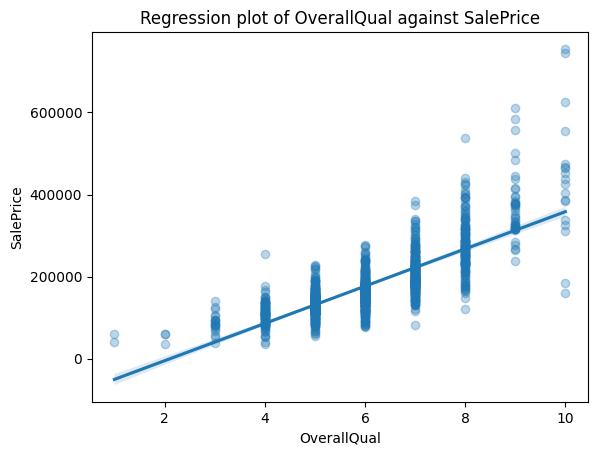

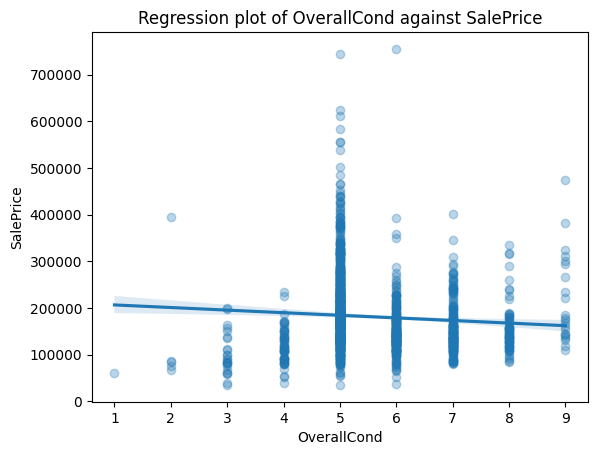

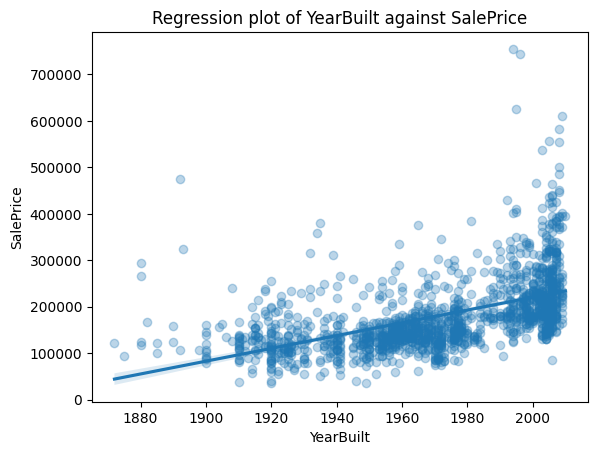

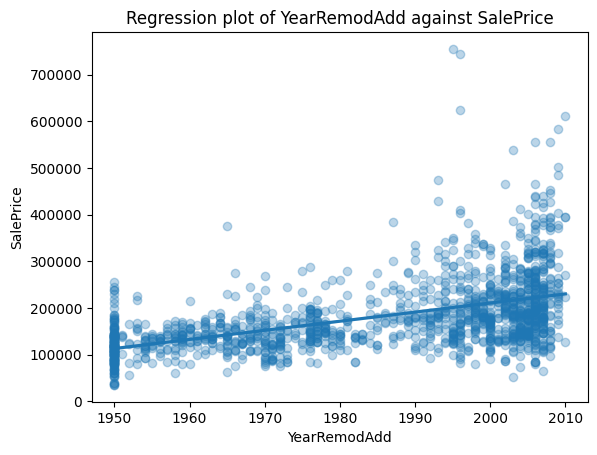

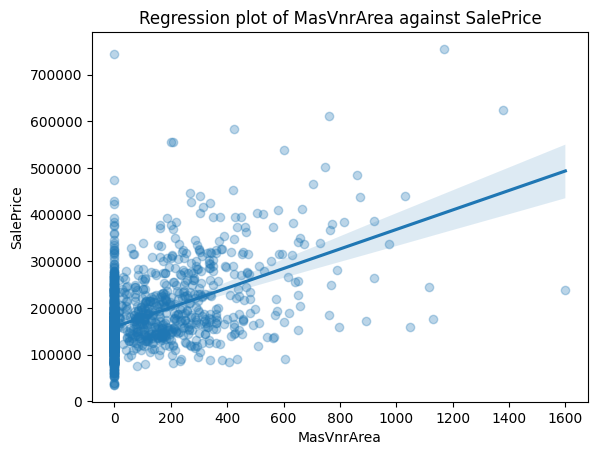

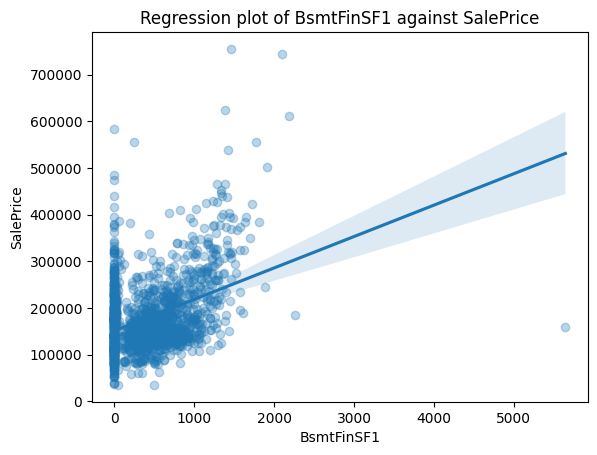

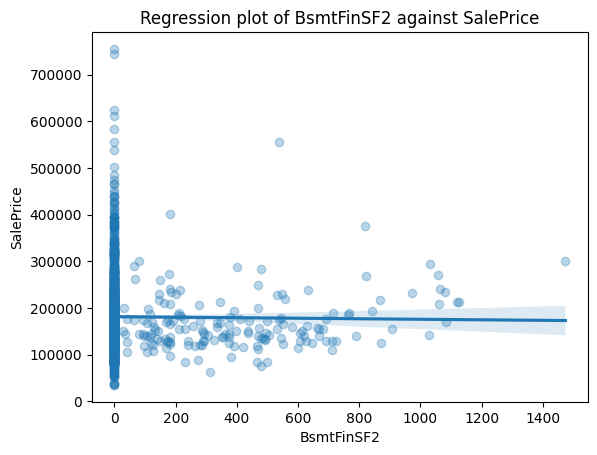

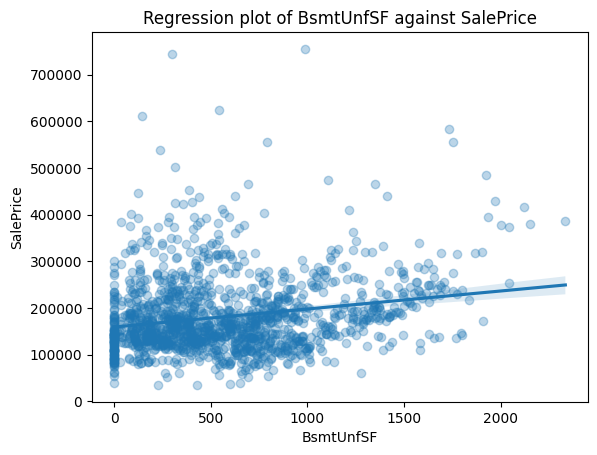

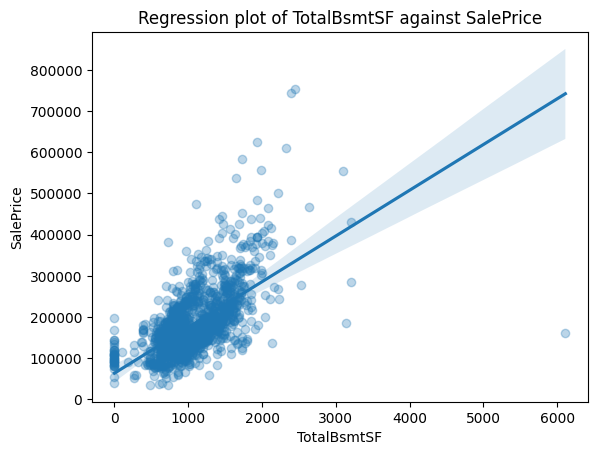

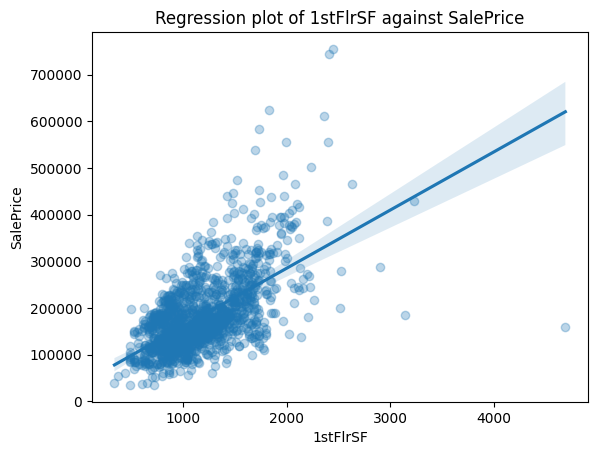

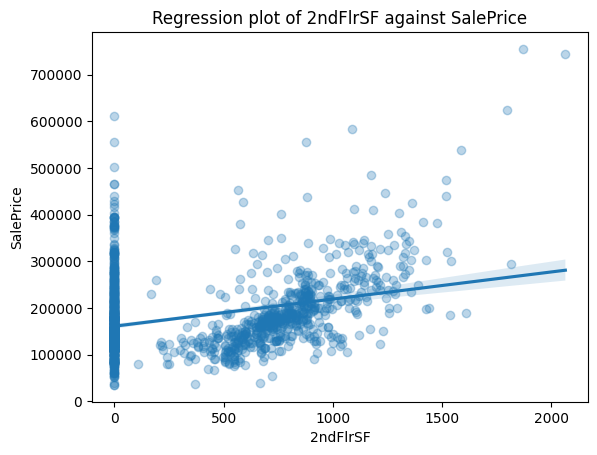

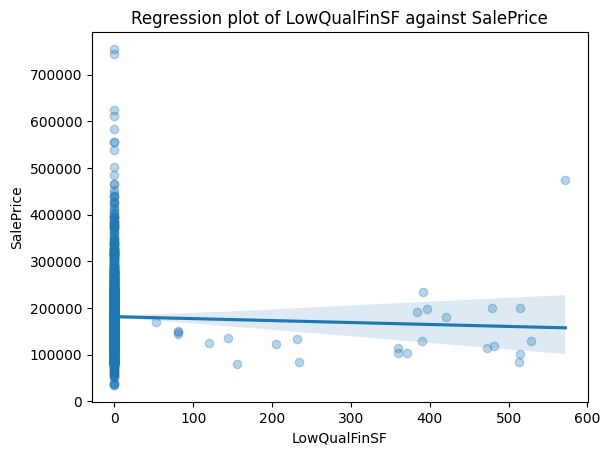

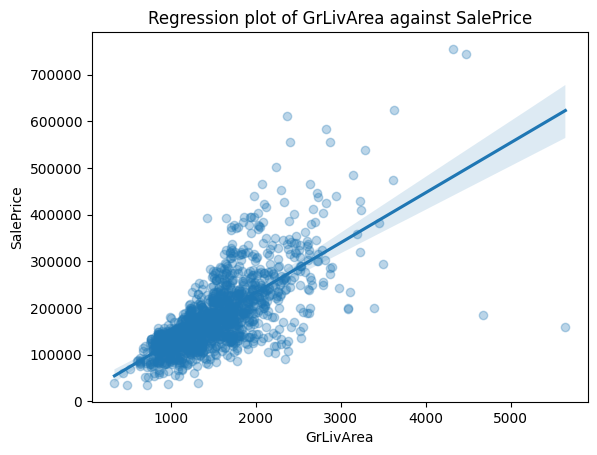

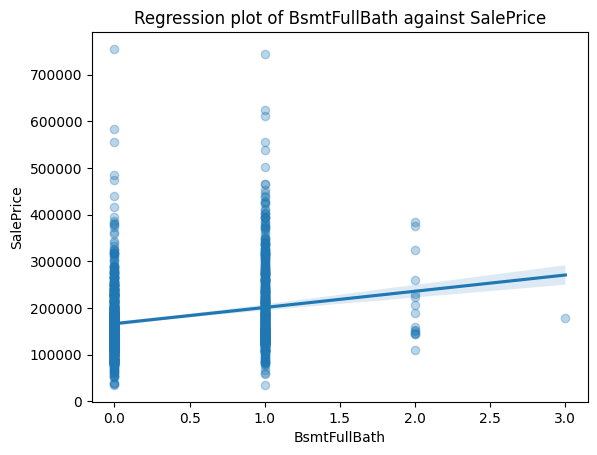

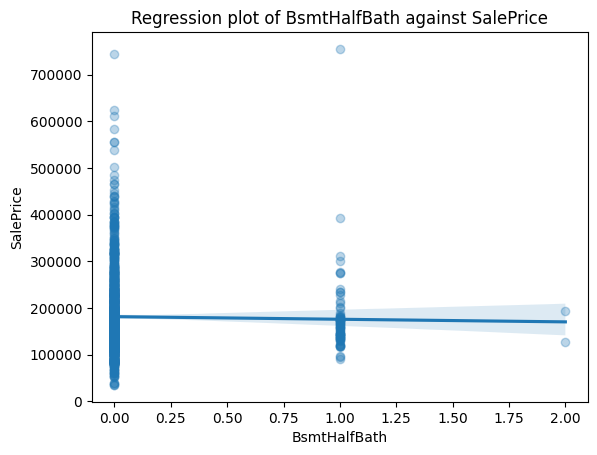

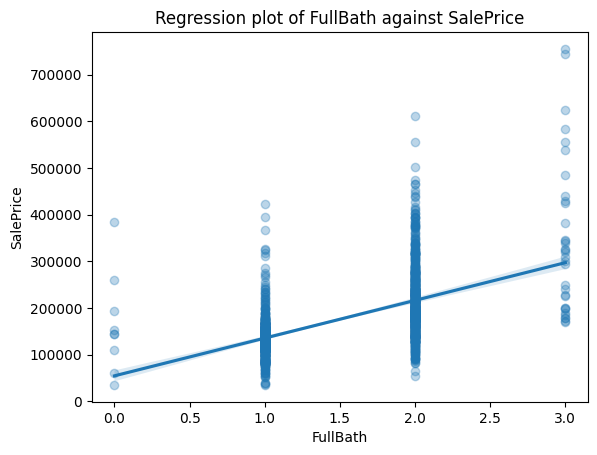

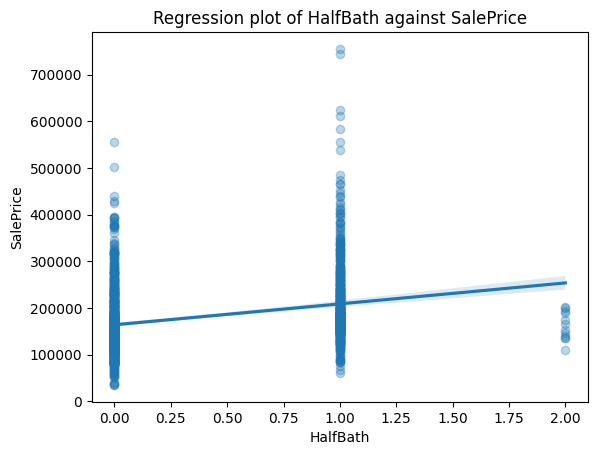

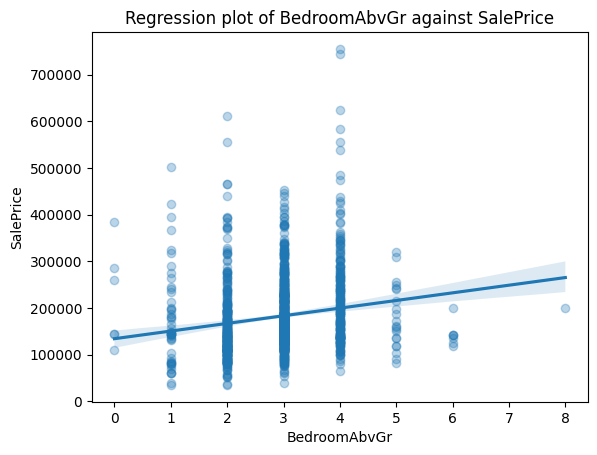

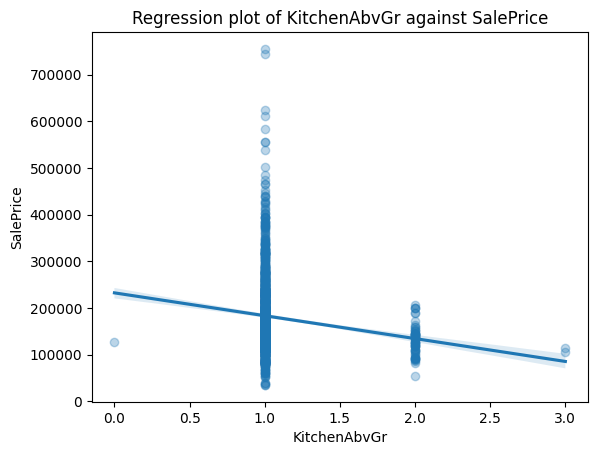

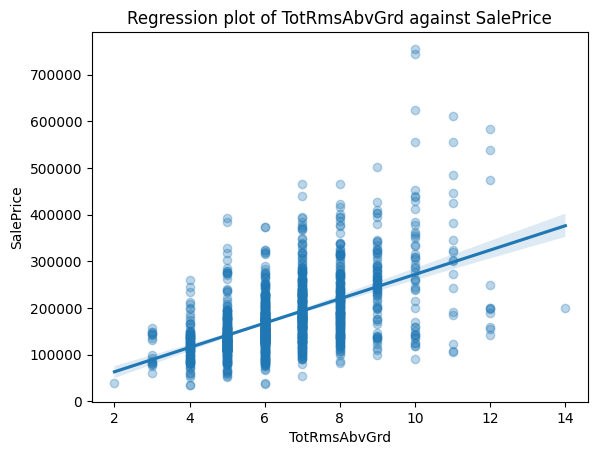

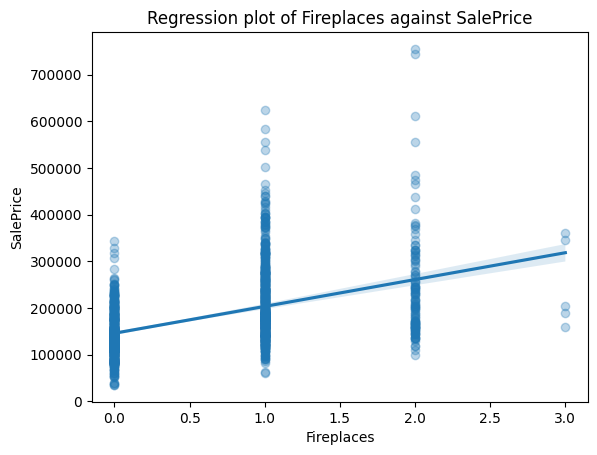

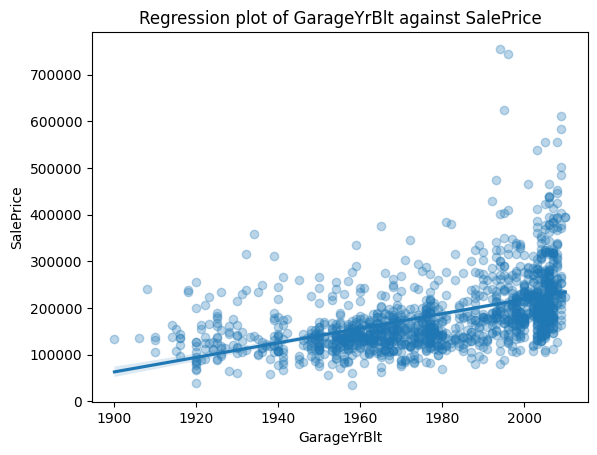

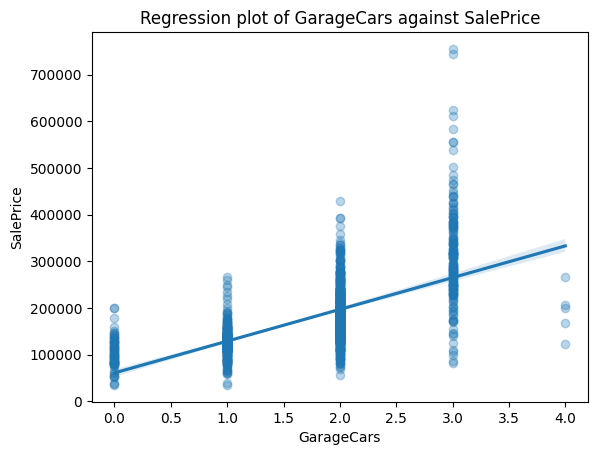

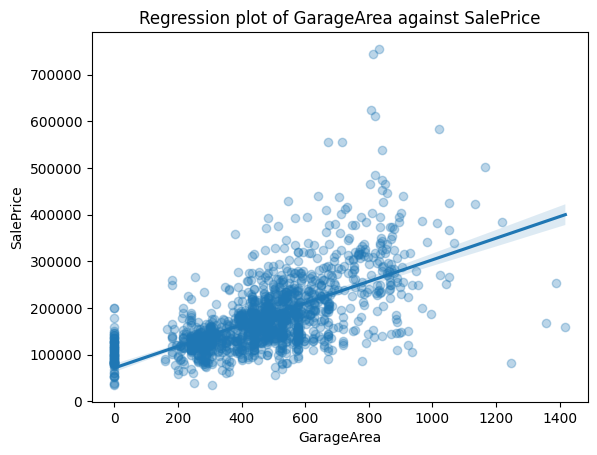

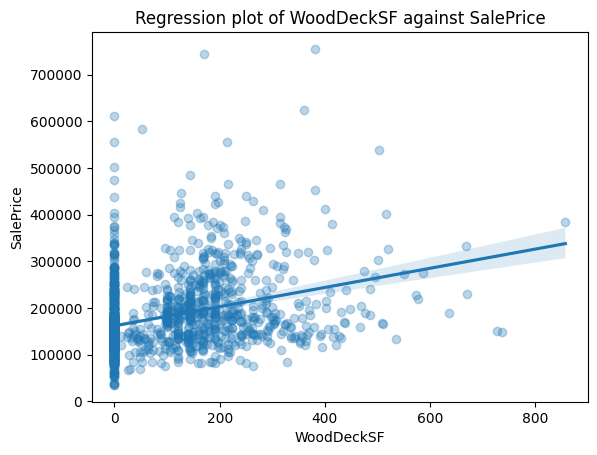

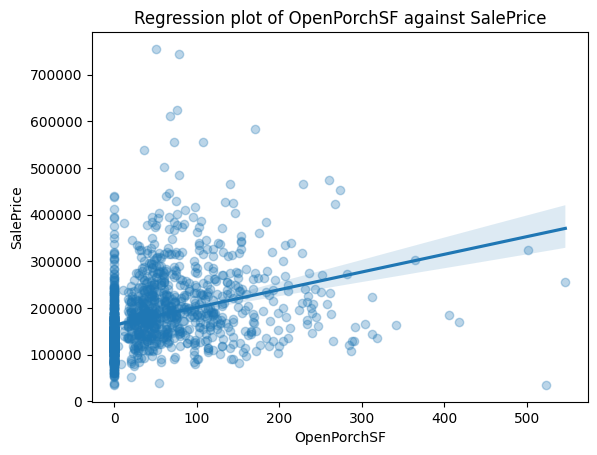

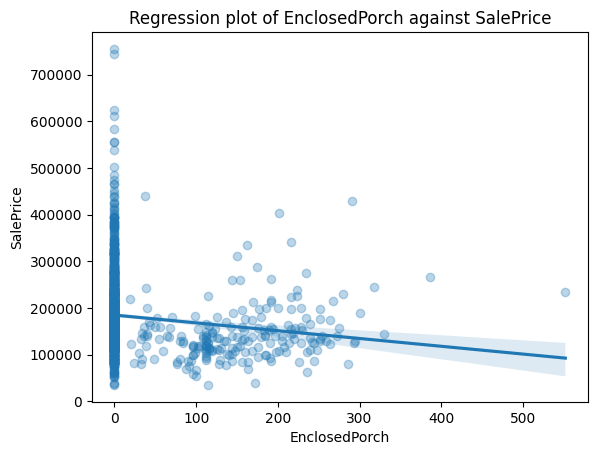

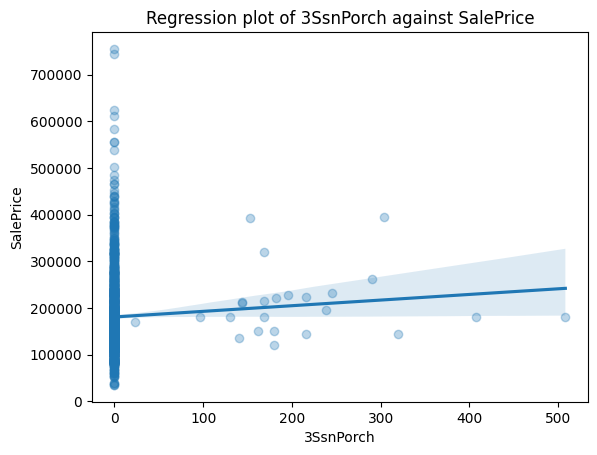

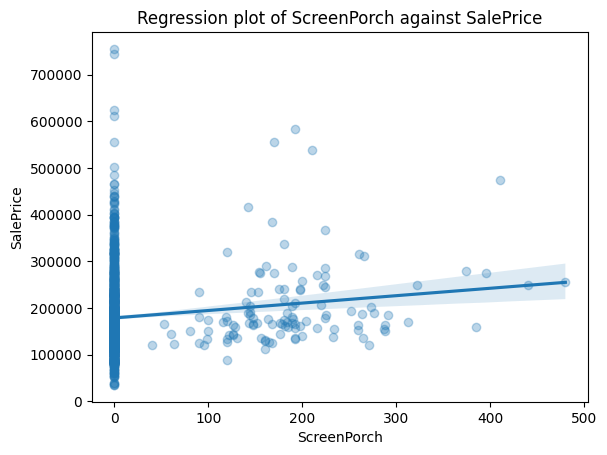

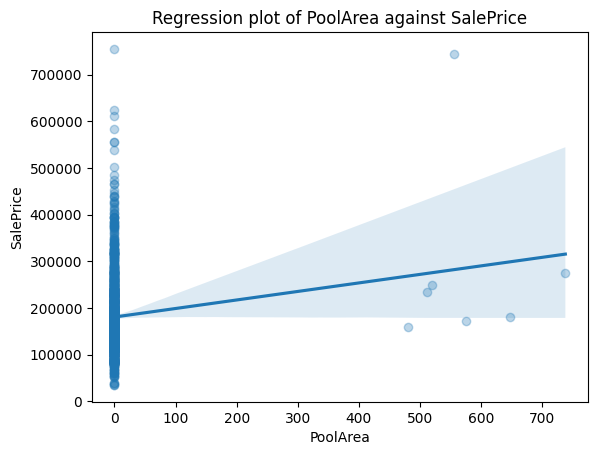

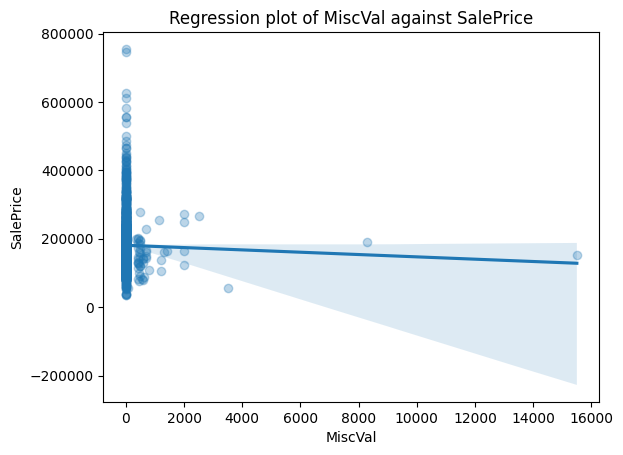

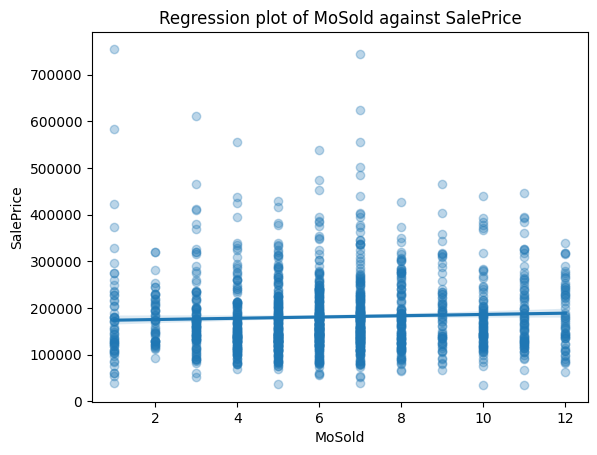

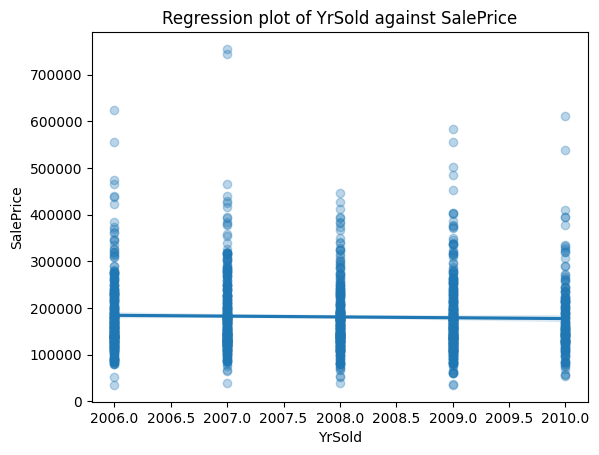

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
import joblib

# Calculate Relative Absolute Error (RAE)
def relative_absolute_error(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mean_target = y_true.mean()
    rae = mae / mean_target
    return rae

# Load your data
train_data = pd.read_csv('/content/House_Sales_Price_Prediction_2/MyDrive/sales_price train.csv')
test_data = pd.read_csv('/content/House_Sales_Price_Prediction_2/MyDrive/sales_price test.csv')

# Drop rows with missing target values
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

# Separate target from predictors
y = train_data.SalePrice
X = train_data.drop(['SalePrice'], axis=1)

# Select only numerical columns (exclude object type)
X = X.select_dtypes(exclude=['object'])
X_test = test_data.select_dtypes(exclude=['object'])

# Handle missing values by imputation
my_imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(my_imputer.fit_transform(X))
X_test_imputed = pd.DataFrame(my_imputer.transform(X_test))
X_imputed.columns = X.columns
X_test_imputed.columns = X_test.columns

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_imputed, y, train_size=0.8, test_size=0.2, random_state=0)

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Calculate and print RAE for Linear Regression model
linear_preds_valid = linear_model.predict(X_valid)
linear_rae_valid = relative_absolute_error(y_valid, linear_preds_valid)
print("RAE (Linear Regression):", linear_rae_valid)

# Save the final model using joblib
joblib.dump(linear_model, 'linear_model.joblib')

# Make predictions on the test data
final_preds_test = linear_model.predict(X_test_imputed)

# Save test predictions to file
output_final = pd.DataFrame({'Id': test_data.index, 'SalePrice': final_preds_test})
output_final.to_csv('submission_final.csv', index=False)
print(output_final)

# Plot regression plot for each numeric column against SalePrice
plt.figure(figsize=(15, 10))
for column in X_imputed.columns:
    sns.regplot(x=column, y=y, data=train_data, scatter_kws={'alpha':0.3})
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.title(f'Regression plot of {column} against SalePrice')
    plt.show()